In [25]:
import pandas as pd
import numpy as np
from PIL import Image

import os
import cv2

from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

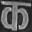

In [26]:
Image.open('../character_ocr/क/क_219.jpg')

In [27]:
main_path='../character_ocr'
dataset=pd.DataFrame()
for x in os.listdir(main_path):
    df=pd.DataFrame({'imgs':os.listdir(f'{main_path}/{x}')})
    df['target']=x
    dataset=pd.concat([dataset,df])

In [28]:
dataset['imgs']='../character_ocr/'+dataset['target']+'/'+dataset['imgs']

In [29]:
encoded={y:x for x,y in enumerate(dataset.target.unique()) }
decoded=dict(enumerate(dataset.target.unique()))

In [30]:
def image_data_gen(path):
    im=cv2.imread(path)
    return cv2.resize(im,(32,32))

In [31]:
dataset['target_encoded']=dataset['target'].map(encoded)


In [32]:
train_x,test_x,train_y,test_y=train_test_split(dataset['imgs'],dataset['target_encoded'],stratify=dataset['target_encoded'])

In [33]:
train_imgs=list(map(image_data_gen,train_x.tolist()))
test_imgs=list(map(image_data_gen,test_x.tolist()))

In [34]:
train_imgs=np.stack(train_imgs)
test_imgs=np.stack(test_imgs)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [36]:
model=Sequential([
    
    Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'),
    MaxPool2D(),
    
    Conv2D(32,(2,2),activation='relu'),
    MaxPool2D(),
    
    Flatten(),
    
    Dense(50,activation='relu'),
    Dropout(.12),
    Dense(44,activation='relu'),
    Dense(34,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        78,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 44)             │         2,244 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 34)             │         1,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,240 (360.31 KB)

 Trainable params: 92,240 (360.31 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(train_imgs,np.array(train_y),batch_size=128,epochs=20)


Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 41s 250ms/step - accuracy: 0.1144 - loss: 5.2803
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 165ms/step - accuracy: 0.7275 - loss: 1.0312
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 28s 182ms/step - accuracy: 0.8713 - loss: 0.4823
Epoch 4/20
 29/156 ━━━━━━━━━━━━━━━━━━━━ 22s 177ms/step - accuracy: 0.8961 - loss: 0.3597

In [ ]:
import cv2

In [ ]:
im=cv2.imread('../character_ocr/५/५_0.jpg')
im1=cv2.imread('../character_ocr/०/०_450.jpg')
inp=np.stack([im,im1])
ans=model.predict(inp)
ans=np.argmax(ans,axis=1)
[decoded[x] for x in ans]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


['४', '४']

In [ ]:
ans=model.predict(test_imgs)


208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
ans=np.argmax(ans,axis=1)

In [ ]:
print(classification_report(test_y,ans))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       211
           1       0.00      0.00      0.00       146
           2       0.00      0.00      0.00       192
           3       0.04      1.00      0.07       250
           4       0.00      0.00      0.00       211
           5       0.00      0.00      0.00       250
           6       0.00      0.00      0.00       250
           7       0.00      0.00      0.00       148
           8       0.00      0.00      0.00       231
           9       0.00      0.00      0.00       225
          10       0.00      0.00      0.00       138
          11       0.00      0.00      0.00       197
          12       0.00      0.00      0.00        42
          13       0.00      0.00      0.00       224
          14       0.00      0.00      0.00       226
          15       0.00      0.00      0.00       192
          16       0.00      0.00      0.00       176
          17       0.00    

/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zephyr/Desktop/.code/college/alnpr/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [ ]:
print(accuracy_score(test_y,ans))

0.037678975131876416


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the classes for the test data
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels back to their original form
y_true = np.argmax(test_y, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32, 1), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (32, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 1), dtype=string)
  • training=False
  • mask=None